# Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need
- Read that data into Python and call the dataframe churnData
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type.Convert this column into numeric type using pd.to_numeric function
- Check for null values in the dataframe. Replace the null values
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    - Scale the features either by using normalizer or a standard scaler
    - Split the data into a training set and a test set
    - Fit a logistic regression model on the training data
    - Check the accuracy on the test data
    
**Note**: So far we have not balanced the data <br>

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

## Import the required libraries and modules that you would need

In [632]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Read that data into Python and call the dataframe churnData

In [633]:
churnData = pd.read_csv('files_for_lab/Customer-Churn.csv')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type.Convert this column into numeric type using pd.to_numeric function

In [634]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [635]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"],errors="coerce")
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

## Check for null values in the dataframe. Replace the null values

In [636]:
print('\nCOLUMNS WITH NAN VALUES')
print('-----------------------\n')

for column in churnData.columns:
    if churnData[column].isna().sum() > 0:
        print(f'- {column} -> {churnData[column].isna().sum()}')


COLUMNS WITH NAN VALUES
-----------------------

- TotalCharges -> 11


In [637]:
churnData.shape

(7043, 16)

#### There are only 11 missing values from 7043, so I will drop them.

In [638]:
churnData = churnData.dropna(axis='index')

In [639]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

### Scale the features either by using normalizer or a standard scaler

In [640]:
numerical = churnData.select_dtypes(include=['int64', 'float64'])
numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [641]:
transformer = StandardScaler().fit(numerical)
num_standarized = transformer.transform(numerical)
num_standarized = pd.DataFrame(num_standarized)
num_standarized.columns = numerical.columns
X = num_standarized
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.440327,-1.280248,-1.161694,-0.994194
1,-0.440327,0.064303,-0.260878,-0.173740
2,-0.440327,-1.239504,-0.363923,-0.959649
3,-0.440327,0.512486,-0.747850,-0.195248
4,-0.440327,-1.239504,0.196178,-0.940457
...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129180
7028,-0.440327,1.612573,1.276493,2.241056
7029,-0.440327,-0.872808,-1.170004,-0.854514
7030,2.271039,-1.158016,0.319168,-0.872095


In [642]:
y = churnData['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

### Split the data into a training set and a test set


In [643]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
y_pred = classification.predict(X_test)

### Fit a logistic regression model on the training data

In [644]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

### Check the accuracy on the test data

In [647]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [648]:
print("The accuracy of the logistic_regression model on imbalanced data is: %4.2f "%(metrics.accuracy_score(y_test_up, y_pred_up)))

The accuracy of the logistic_regression model on imbalanced data is: 0.73 


In [649]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.86      0.84      1528
         Yes       0.58      0.53      0.55       582

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.76      0.77      0.76      2110



## Managing imbalance in the dataset

### Check for the imbalance

In [650]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({'No': 5163, 'Yes': 1869})


<AxesSubplot:xlabel='Churn', ylabel='count'>

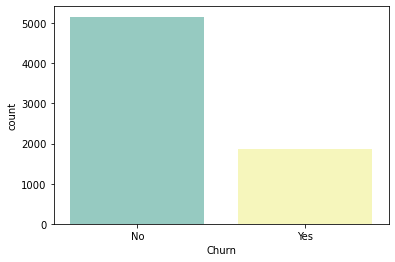

In [651]:
sns.countplot(x=churnData['Churn'],data = churnData,palette = 'Set3')

### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes

### Downsampling

In [652]:
category_0 = churnData[churnData['Churn'] == 'No']
category_1 = churnData[churnData['Churn'] == 'Yes']
print(category_0.shape)
print(category_1.shape)

(5163, 16)
(1869, 16)


In [656]:
# Downsampling
category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [657]:
churnData_downsampled = pd.concat([category_0, category_1], axis=0)
churnData_downsampled = churnData_downsampled.sample(frac=1)
churnData_downsampled['Churn'].value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

In [658]:
X_down = churnData_downsampled._get_numeric_data()
y_down = churnData_downsampled['Churn']

In [659]:
X_down

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3003,0,27,79.50,2180.55
6516,0,1,48.95,48.95
5927,0,51,24.75,1234.60
6297,0,64,113.35,7222.75
1977,1,31,90.70,2845.15
...,...,...,...,...
6762,0,35,55.00,2010.55
2775,1,53,60.05,3229.65
3260,0,31,78.45,2435.15
6087,0,26,39.95,1023.75


In [660]:
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, test_size=0.2,random_state=10)
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_down, y_train_down)
y_pred_down = classification.predict(X_test_down)
print("The accuracy of the logistic_regression model after downnsampling is: %4.2f "%(metrics.accuracy_score(y_test_up, y_pred_up)))

The accuracy of the logistic_regression model after downnsampling is: 0.73 


### Upsampling

In [661]:
category_0 = churnData[churnData['Churn'] == 'No']
category_1 = churnData[churnData['Churn'] == 'Yes']
print(category_0.shape)
print(category_1.shape)

(5163, 16)
(1869, 16)


In [662]:
# Upsampling
category_1 = category_1.sample(len(category_0), replace=True)
print(category_0.shape)
print(category_1.shape)

(5163, 16)
(5163, 16)


In [663]:
churnData_upsampled = pd.concat([category_0, category_1], axis=0)
churnData_upsampled = churnData_upsampled.sample(frac=1)
#churnData_downsampled.reset_index()
churnData_upsampled['Churn'].value_counts()

No     5163
Yes    5163
Name: Churn, dtype: int64

In [664]:
X_up = churnData_upsampled._get_numeric_data()
y_up = churnData_upsampled['Churn']

In [665]:
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.2,random_state=10)
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_up, y_train_up)
y_pred_up = classification.predict(X_test_up)
print("The accuracy of the logistic_regression model after upsampling is: %4.2f "%(metrics.accuracy_score(y_test_up, y_pred_up)))

The accuracy of the logistic_regression model after upsampling is: 0.72 


### Oversampling with SMOTE

In [666]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

In [667]:
counter = Counter(y_sm)
print(counter)

Counter({'No': 5163, 'Yes': 5163})


In [668]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_sm, y_sm, test_size=0.2, 
                                                                                   random_state=10)
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_smote, y_train_smote)
y_predict_smote = classification.predict(X_test_smote)
print("The accuracy of the logistic_regression model after oversampling with SMOTE is: %4.2f "% (classification.score(X_test_smote, y_test_smote)))

The accuracy of the logistic_regression model after oversampling with SMOTE is: 0.73 


### Downsampling with Tomek Links

In [669]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tom, y_tom = tl.fit_resample(X, y)

In [670]:
counter = Counter(y_tom)
print(counter)

Counter({'No': 4651, 'Yes': 1869})


In [671]:
X_train_tom, X_test_tom, y_train_tom, y_test_tom = train_test_split(X_tom, y_tom, test_size=0.2, random_state=100)

In [672]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_tom, y_train_tom)
y_predict_tom = classification.predict(X_test_tom)
print("The accuracy of the logistic_regression model after downsampling with Tomek Links is: %4.2f "% (classification.score(X_test_tom, y_test_tom)))

The accuracy of the logistic_regression model after downsampling with Tomek Links is: 0.79 


### Conclusion:
Best accuracy score was with **Downsampling with Tomek Links**